In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Dog classification using tensorflow


In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
print(tf.__version__)
print(hub.__version__)
print("GPU","Available !!" if tf.config.list_physical_devices("GPU") else  "not available")

2.2.0-rc3
0.8.0
GPU Available !!


In [0]:
import pandas as pd
labels = pd.read_csv("/content/drive/My Drive/Datasets/Dog/labels.csv")

In [5]:
labels.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     36c1add2344fd41b7a73e06b61727a64  scottish_deerhound
freq                                   1                 126

In [6]:
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

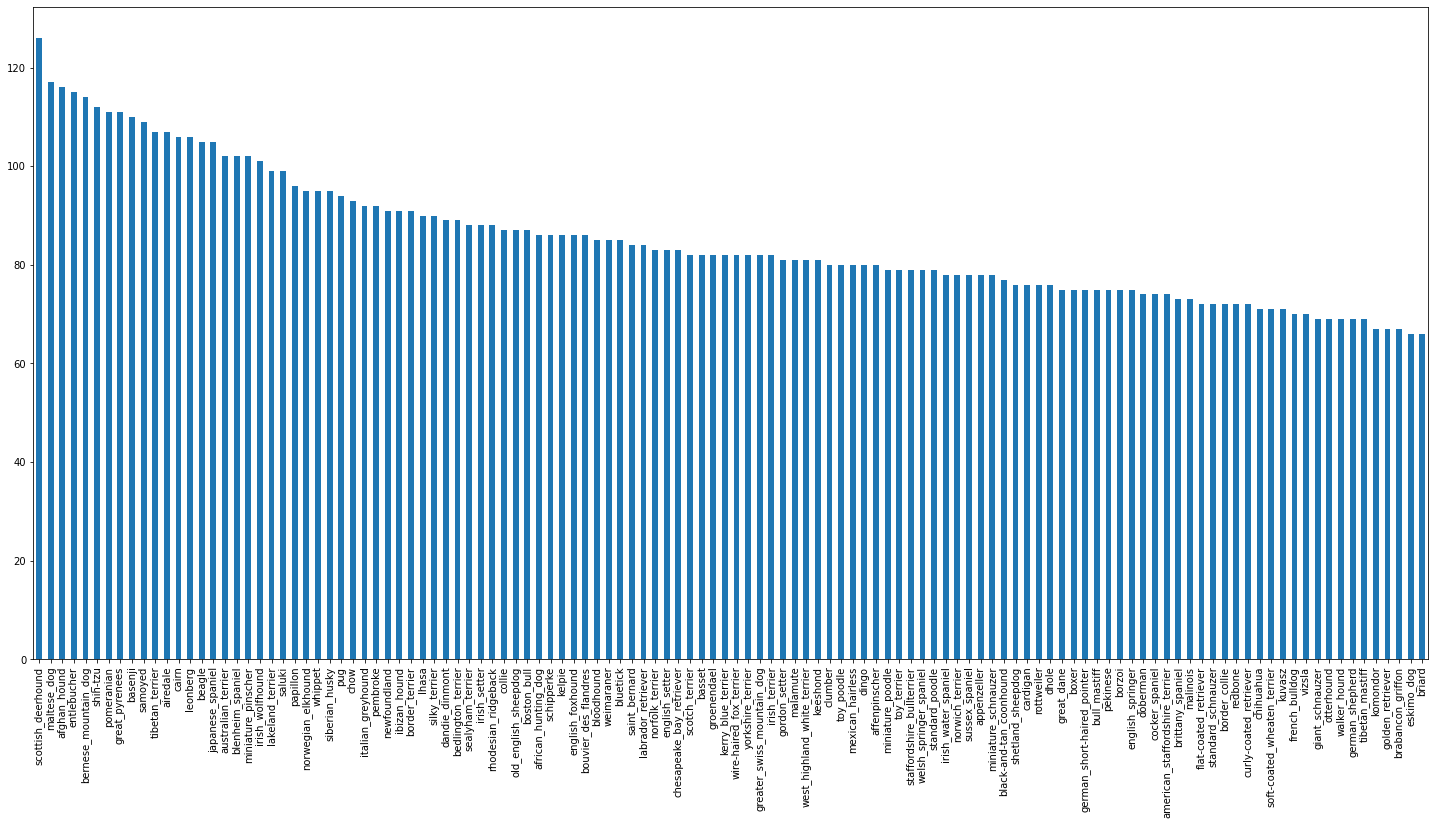

In [7]:
labels["breed"].value_counts().plot.bar(figsize=(25,12))

In [8]:
filenames = ["drive/My Drive/Datasets/Dog/train/"+fname+".jpg" for fname in labels["id"]]
filenames[:10]

['drive/My Drive/Datasets/Dog/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Datasets/Dog/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Datasets/Dog/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Datasets/Dog/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Datasets/Dog/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Datasets/Dog/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Datasets/Dog/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Datasets/Dog/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Datasets/Dog/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Datasets/Dog/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [9]:
if len(labels) == len(filenames):
  print("Equal number of data")
else:
  print("some data missing")

Equal number of data


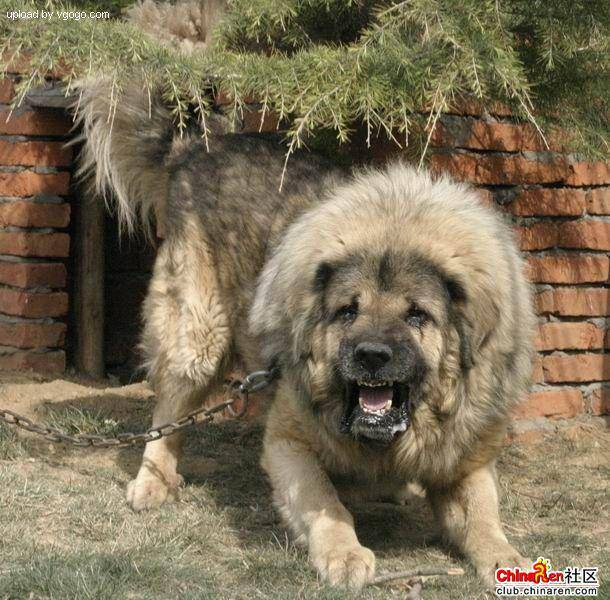

In [10]:
from IPython.display import Image
Image(filenames[9000])

In [0]:
import numpy as np
breed = labels["breed"]
breed = np.array(breed)

In [12]:
len(breed)

10222

In [13]:
breed

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [14]:
unique_breed = np.unique(breed)
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [15]:
len(unique_breed)

120

In [16]:
print(breed[0])

boston_bull


In [17]:
breed[0]==unique_breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
boolean_labels = [i == unique_breed for i in breed]

In [19]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
x = filenames
y = boolean_labels

In [0]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000,max:10222}

In [0]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=47)

In [23]:
x_train[:2],y_train[:2]

(['drive/My Drive/Datasets/Dog/train/12c222ec2e7808183056af545a4bc046.jpg',
  'drive/My Drive/Datasets/Dog/train/131c49315a5bc73880b305a844bf531a.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fals

In [0]:
IMG_SIZE = 224 
def process_image(img_path,img_size=IMG_SIZE):
  """
  Converting images into tensors
  """
  image = tf.io.read_file(img_path)
  image = tf.image.decode_jpeg(image,channels=3)
  image = tf.image.convert_image_dtype(image,tf.float32)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image 

In [0]:
# A function that returns a tuple of the data
def get_image_label(image_path,label):
  image = process_image(image_path)
  return image,label

In [26]:
(process_image(x[47]),tf.constant(y[47]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[7.2692007e-01, 8.1488407e-01, 4.9016413e-01],
         [7.5051785e-01, 7.9363686e-01, 5.1427764e-01],
         [7.1413958e-01, 7.3469281e-01, 5.1666063e-01],
         ...,
         [1.6502100e-01, 1.6078432e-01, 1.5451673e-01],
         [1.6078432e-01, 1.5294118e-01, 1.5805329e-01],
         [1.6078432e-01, 1.5294118e-01, 1.6470589e-01]],
 
        [[7.1559834e-01, 8.0501539e-01, 5.1447654e-01],
         [6.2286758e-01, 6.7307764e-01, 4.1200447e-01],
         [8.5228354e-01, 8.8433713e-01, 6.6206467e-01],
         ...,
         [1.6502100e-01, 1.6078432e-01, 1.5451673e-01],
         [1.6078432e-01, 1.5294118e-01, 1.5805329e-01],
         [1.6078432e-01, 1.5294118e-01, 1.6470589e-01]],
 
        [[5.4909343e-01, 6.5820581e-01, 4.1090828e-01],
         [6.8486714e-01, 7.5514734e-01, 5.1580900e-01],
         [6.5128195e-01, 7.0019346e-01, 4.7223482e-01],
         ...,
         [1.6502100e-01, 1.6078432e-01, 1.5451673e-01],


In [0]:
BATCH_SIZE = 32
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data = data.shuffle(buffer_size=len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch

In [28]:
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,valid_data=True)

Creating training data batches...
Creating validation data batches...


In [29]:
# returns different attributes of data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
  plt.figure(figsize=(15,15))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breed[labels[i].argmax()])
    plt.axis("off")

In [31]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.15302418, 0.26382625, 0.10004752],
          [0.17928071, 0.28575832, 0.14895998],
          [0.17937917, 0.28526154, 0.15828088],
          ...,
          [0.01604468, 0.03137911, 0.01354758],
          [0.04853402, 0.06814186, 0.04069088],
          [0.05716171, 0.07676955, 0.04931857]],
 
         [[0.10239737, 0.21220128, 0.05542608],
          [0.15141651, 0.25729886, 0.12678416],
          [0.07141446, 0.17725655, 0.05514521],
          ...,
          [0.03002796, 0.04962526, 0.02610991],
          [0.15946096, 0.17906882, 0.15161783],
          [0.02637636, 0.04598421, 0.01853322]],
 
         [[0.15209053, 0.25486422, 0.11887334],
          [0.1591647 , 0.25739297, 0.1476626 ],
          [0.1299219 , 0.22682317, 0.1252562 ],
          ...,
          [0.02073763, 0.04004795, 0.01691523],
          [0.07755078, 0.09715863, 0.06970765],
          [0.07968134, 0.09928918, 0.0718382 ]],
 
         ...,
 
         [[0.4265038 , 0.48140576, 0.48140576],
          [0.42191

In [32]:
len(train_images),len(train_labels)

(32, 32)

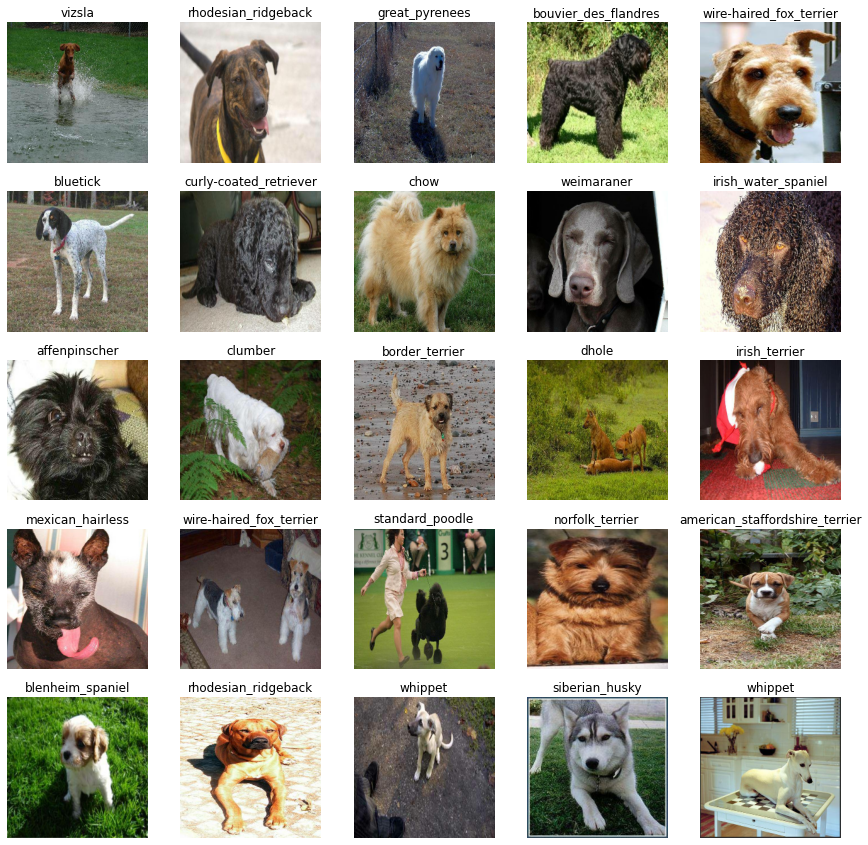

In [33]:
show_25_images(train_images,train_labels)

In [0]:
val_images, val_labels = next(val_data.as_numpy_iterator())

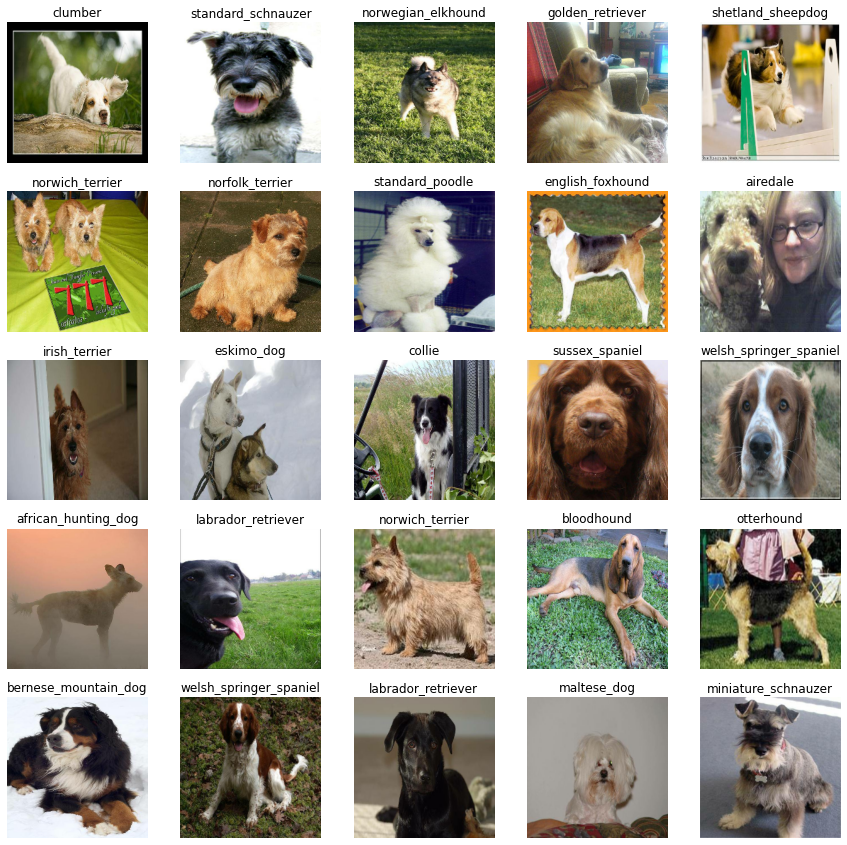

In [35]:
show_25_images(val_images,val_labels)

In [0]:
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE = len(unique_breed)
URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,
                 URL=URL):
  model = tf.keras.Sequential([
                               hub.KerasLayer(URL),
                               tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")
  ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
      )
  model.build(INPUT_SHAPE)

  return model


In [38]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [0]:
%load_ext tensorboard

In [0]:
import datetime
import os
def create_tensorboard_callback():
  logdir = os.path.join("drive/My Drive/Datasets/Dog/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [0]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                              patience=3)

In [0]:
NUM_EPOCHS = 100 #@param{type:"slider",min:10,max:100}


In [0]:
def train_model():
  model=create_model()
  tensorboard = create_tensorboard_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stop])
  return model
  

In [44]:
model = train_model()

Epoch 1/100
25/25 [==============================] - 391s 16s/step - loss: 4.6343 - accuracy: 0.0913 - val_loss: 3.2432 - val_accuracy: 0.2500
Epoch 2/100
25/25 [==============================] - 5s 206ms/step - loss: 1.6489 - accuracy: 0.6963 - val_loss: 2.0446 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 5s 206ms/step - loss: 0.5511 - accuracy: 0.9500 - val_loss: 1.6789 - val_accuracy: 0.5950
Epoch 4/100
25/25 [==============================] - 5s 202ms/step - loss: 0.2405 - accuracy: 0.9900 - val_loss: 1.5308 - val_accuracy: 0.6000
Epoch 5/100
25/25 [==============================] - 5s 206ms/step - loss: 0.1381 - accuracy: 0.9987 - val_loss: 1.4687 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 5s 206ms/step - loss: 0.0973 - accuracy: 1.0000 - val_loss: 1.4408 - val_accuracy: 0.6200
Epoch 7/100
25/25 [==============================] - 5s 205ms/step - loss: 0.0724 - accuracy: 1.0000 - val_loss: 1.4271 - val_accuracy: 0.6350

In [45]:
%tensorboard --logdir drive/My\ Drive/Datasets/Dog/logs

<IPython.core.display.Javascript object>

In [46]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [47]:
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 124ms/step


array([[2.7537698e-04, 5.1776155e-05, 8.0152720e-05, ..., 1.3132463e-05,
        1.9940178e-05, 4.2333009e-04],
       [1.3314467e-03, 2.1183090e-05, 2.1479045e-04, ..., 6.4449297e-05,
        8.8413563e-03, 1.8591771e-04],
       [1.6181128e-05, 2.6475898e-06, 8.8187742e-05, ..., 8.7766839e-06,
        7.3510778e-06, 2.4803716e-05],
       ...,
       [2.3195960e-03, 8.1361237e-04, 2.1546229e-03, ..., 3.9574967e-04,
        3.0914068e-04, 3.7139982e-03],
       [1.0665164e-03, 1.5080967e-05, 1.7308589e-04, ..., 1.8432040e-03,
        1.3345562e-05, 5.8231573e-05],
       [6.2275772e-06, 9.6589320e-05, 8.1721460e-05, ..., 1.0219758e-05,
        1.2246127e-03, 1.5650821e-04]], dtype=float32)

In [48]:
predictions.shape

(200, 120)

In [49]:
# Exploring predictions array
index = 57
print(predictions[index])
print(f"Max value (probability of prediction: {np.max(predictions[index])}")
print(f"Sum:{np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breed[np.argmax(predictions[index])]}")

[5.79487096e-05 6.00052626e-05 4.88628633e-04 6.03334229e-07
 6.48233327e-05 2.75624598e-06 2.78014835e-04 2.08726502e-04
 1.55581911e-05 4.67069221e-05 2.27157216e-06 2.70447005e-02
 1.11696078e-04 2.36996115e-04 5.05708558e-05 2.26836855e-04
 3.03732057e-04 1.10690904e-04 1.14902374e-04 3.95656480e-06
 2.55804243e-05 2.39290694e-05 1.17974673e-06 7.68585014e-05
 2.19729519e-03 4.23861934e-07 8.85425470e-06 3.16386504e-05
 7.63508782e-04 6.57674915e-04 9.94425955e-06 4.62554744e-04
 7.86102610e-05 3.75489559e-04 2.42051356e-05 1.16333780e-04
 6.18617560e-05 1.19023629e-04 1.41471508e-04 1.07711878e-06
 1.78860268e-04 2.29645375e-04 5.33166713e-07 6.53667985e-06
 1.24029377e-02 2.94587267e-07 2.13446538e-06 3.34335864e-03
 9.84716607e-05 9.47904336e-05 4.77284921e-04 1.40179918e-06
 9.01339881e-05 3.19793223e-08 2.68302017e-07 2.10471808e-05
 9.20802772e-01 3.18814884e-03 1.66025529e-05 3.66070046e-04
 5.47730087e-06 3.48002905e-05 1.34514073e-06 1.49242391e-04
 1.59705905e-06 1.481227

In [50]:
def get_pred_label(predicition_probability):
  return unique_breed[np.argmax(predicition_probability)]

pred_label = get_pred_label(predictions[57])
pred_label

'irish_setter'

In [51]:
 images_ = []            
 labels_ = []

 for image,label in val_data.unbatch().as_numpy_iterator():
   images_.append(image)
   labels_.append(label)
  
images_[47], labels_[47]

(array([[[0.18101233, 0.26728687, 0.17973432],
         [0.08670031, 0.17165305, 0.09194366],
         [0.15913685, 0.24117467, 0.17851475],
         ...,
         [0.04926639, 0.0891123 , 0.05647931],
         [0.1287708 , 0.14837864, 0.13269237],
         [0.0807163 , 0.10032415, 0.08463787]],
 
        [[0.10851865, 0.19082783, 0.12439679],
         [0.1266556 , 0.20896478, 0.14913912],
         [0.1845729 , 0.26300427, 0.21638836],
         ...,
         [0.03731279, 0.07699066, 0.04515241],
         [0.10147012, 0.12107796, 0.10539169],
         [0.07717928, 0.09678712, 0.08110085]],
 
        [[0.21992439, 0.29566842, 0.26727092],
         [0.12203453, 0.19777858, 0.1734526 ],
         [0.13075677, 0.20650083, 0.18464333],
         ...,
         [0.08603312, 0.11082298, 0.09356116],
         [0.11946555, 0.13907339, 0.12257127],
         [0.07335056, 0.0929584 , 0.07189747]],
 
        ...,
 
        [[0.24779856, 0.28309268, 0.05956327],
         [0.23282659, 0.2681207 , 0.06027

In [0]:
def unbatchify(data):
  images = []
  labels = []

  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  return images,labels

In [0]:
val_images, val_labels = unbatchify(val_data)

In [54]:
val_images[47],val_labels[47]

(array([[[0.18101233, 0.26728687, 0.17973432],
         [0.08670031, 0.17165305, 0.09194366],
         [0.15913685, 0.24117467, 0.17851475],
         ...,
         [0.04926639, 0.0891123 , 0.05647931],
         [0.1287708 , 0.14837864, 0.13269237],
         [0.0807163 , 0.10032415, 0.08463787]],
 
        [[0.10851865, 0.19082783, 0.12439679],
         [0.1266556 , 0.20896478, 0.14913912],
         [0.1845729 , 0.26300427, 0.21638836],
         ...,
         [0.03731279, 0.07699066, 0.04515241],
         [0.10147012, 0.12107796, 0.10539169],
         [0.07717928, 0.09678712, 0.08110085]],
 
        [[0.21992439, 0.29566842, 0.26727092],
         [0.12203453, 0.19777858, 0.1734526 ],
         [0.13075677, 0.20650083, 0.18464333],
         ...,
         [0.08603312, 0.11082298, 0.09356116],
         [0.11946555, 0.13907339, 0.12257127],
         [0.07335056, 0.0929584 , 0.07189747]],
 
        ...,
 
        [[0.24779856, 0.28309268, 0.05956327],
         [0.23282659, 0.2681207 , 0.06027

In [55]:
get_pred_label(val_labels[47])

'affenpinscher'

In [0]:
def plot_pred(prediction_probability,labels,images,n=1):
  pred_prob, true_label, image = prediction_probability[n],labels[n],images[n]
  pred_label = get_pred_label(pred_prob)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    color= "green"
  else:
    color = "red"
  plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)

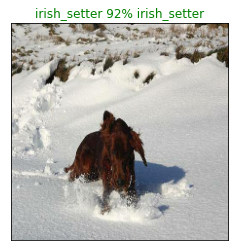

In [57]:
plot_pred(prediction_probability=predictions,
          labels=val_labels, 
          images=val_images,
          n=57)

In [0]:
def pred_plot_conf(predicition_probability, labels, n=1):
  pred_prob, true_label = predicition_probability[n],labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10_pred_index = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_index]
  top_10_pred_labels = unique_breed[top_10_pred_index]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

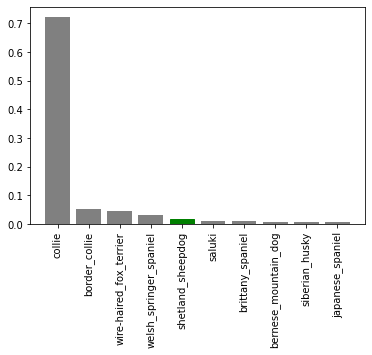

In [59]:
pred_plot_conf(predicition_probability=predictions,
               labels=val_labels,
               n=4)

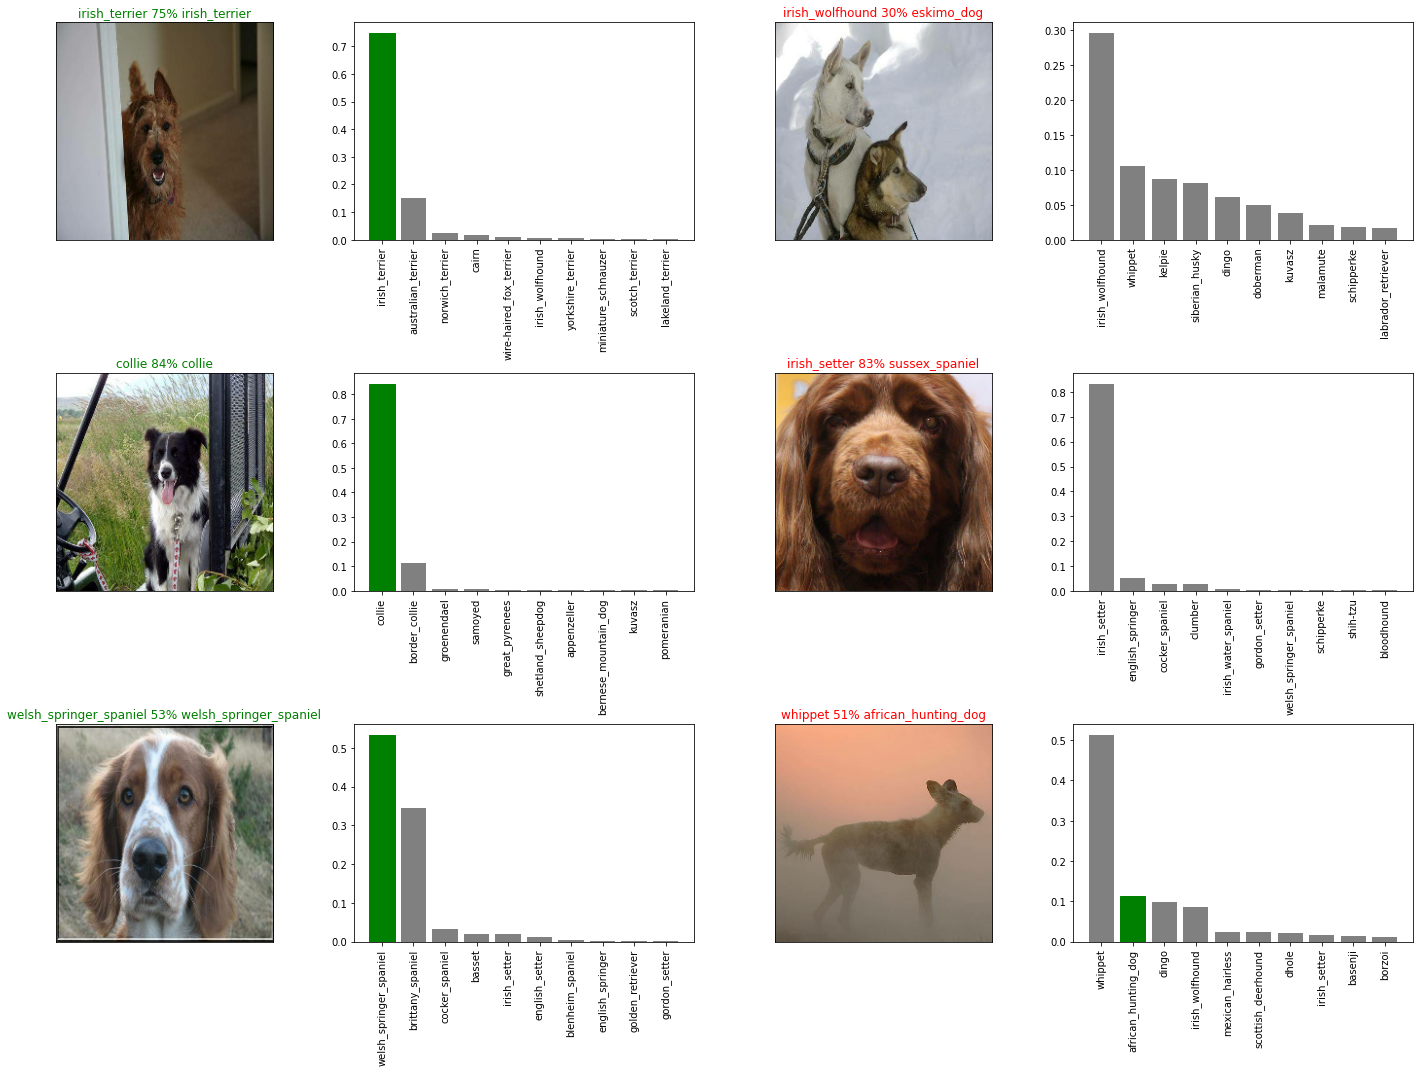

In [60]:
i_multiplier = 10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(prediction_probability=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  pred_plot_conf(predicition_probability=predictions,
                 labels=val_labels,
                 n=i+i_multiplier
                 )
  plt.tight_layout(h_pad=1.0)
plt.show()

In [0]:
def save_model(model,suffix=None):
  modeldir = os.path.join("drive/My Drive/Datasets/Dog/model",datetime.datetime.now().strftime("%Y%m%d-%H%m%s"))
  model_path = modeldir + "-" +suffix + ".h5"  # format of the model
  print(f"Saving model to:{model_path}...s")
  model.save(model_path)
  return model_path

In [0]:
def load_model(model_path):
  """
  Loads the model
  """
  print(f"Loading the saved model from:{model_path}...")
  model = tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [63]:
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Saving model to:drive/My Drive/Datasets/Dog/model/20200417-22041587161868-1000-images-mobilenetv2-Adam.h5...s


'drive/My Drive/Datasets/Dog/model/20200417-22041587161868-1000-images-mobilenetv2-Adam.h5'

### Training the model now on 10222 images 

In [64]:
full_data = create_data_batches(x,y)

Creating training data batches...


In [65]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
full_model = create_model()

In [0]:
full_model_tensorboard = create_tensorboard_callback()

In [68]:
full_model_early_stopping =  tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 4013s 13s/step - loss: 1.3241 - accuracy: 0.6710
Epoch 2/100
320/320 [==============================] - 56s 174ms/step - loss: 0.4032 - accuracy: 0.8798
Epoch 3/100
320/320 [==============================] - 55s 171ms/step - loss: 0.2381 - accuracy: 0.9319
Epoch 4/100
320/320 [==============================] - 54s 168ms/step - loss: 0.1581 - accuracy: 0.9620
Epoch 5/100
320/320 [==============================] - 53s 166ms/step - loss: 0.1052 - accuracy: 0.9782
Epoch 6/100
320/320 [==============================] - 51s 158ms/step - loss: 0.0775 - accuracy: 0.9871
Epoch 7/100
320/320 [==============================] - 50s 155ms/step - loss: 0.0582 - accuracy: 0.9915
Epoch 8/100
320/320 [==============================] - 49s 155ms/step - loss: 0.0465 - accuracy: 0.9943
Epoch 9/100
320/320 [==============================] - 50s 158ms/step - loss: 0.0381 - accuracy: 0.9955
Epoch 10/100
320/320 [==============================] - 50s 156m

In [69]:
save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")


Saving model to:drive/My Drive/Datasets/Dog/model/20200417-23041587166936-full-image-set-mobilenetv2-Adam.h5...s


'drive/My Drive/Datasets/Dog/model/20200417-23041587166936-full-image-set-mobilenetv2-Adam.h5'

In [72]:
load_full_model = load_model("drive/My Drive/Datasets/Dog/model/20200417-18041587148796-full-image-set-mobilenetv2-Adam.h5")

Loading the saved model from:drive/My Drive/Datasets/Dog/model/20200417-18041587148796-full-image-set-mobilenetv2-Adam.h5...


### Making prediction on test dataset

In [73]:
test_path = "/content/drive/My Drive/Datasets/Dog/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/My Drive/Datasets/Dog/test/e66a91249a4979a86db48e5c64b81a88.jpg',
 '/content/drive/My Drive/Datasets/Dog/test/dd7bf84df93991b7c15ec739c82acc04.jpg',
 '/content/drive/My Drive/Datasets/Dog/test/dd8c716a81edb1cac3d4cb2b6c47880a.jpg',
 '/content/drive/My Drive/Datasets/Dog/test/e13f3871a8b4a745717ba6903f0dfe05.jpg',
 '/content/drive/My Drive/Datasets/Dog/test/e610bd621c660546f7cd1cd6554a5caf.jpg',
 '/content/drive/My Drive/Datasets/Dog/test/e7041fdc87517192097e62b3822309b7.jpg',
 '/content/drive/My Drive/Datasets/Dog/test/e587c21aedc81f89b83dd326e034e7e0.jpg',
 '/content/drive/My Drive/Datasets/Dog/test/de172eece3080506aa3bcf1967f4a90b.jpg',
 '/content/drive/My Drive/Datasets/Dog/test/e61cd2626c01dd00117eca55fb099f5d.jpg',
 '/content/drive/My Drive/Datasets/Dog/test/e732916519751eaa0cb2ba0cc1217ab9.jpg']

In [74]:
test_data = create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [75]:
test_prediction = full_model.predict(test_data,verbose=1)

324/324 [==============================] - 4508s 14s/step


In [0]:
np.savetxt("drive/My Drive/Datasets/Dog/prediction_array.csv",test_prediction,delimiter=",")